In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data-export (1).csv')
df

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
...,...,...,...,...,...,...,...,...,...,...
3178,Unassigned,2024042806,0,1,0,0,0,2,0,2
3179,Unassigned,2024043005,0,1,0,0,0,2,0,2
3180,Unassigned,2024043006,0,1,0,0,0,2,0,2
3181,Unassigned,2024050105,0,1,0,0,0,2,0,2


In [3]:
df.columns = df.loc[0]
df = df.drop(index = 0).reset_index(drop = True)
df.columns = ['Channel group', 'DateHour', 'Useres', 'Sessions', 'Engaged Sessions', 'Avg Engaged time per Session', 'Engaged Session per user', 'Events per Session', 'Engagement rate', 'Event count' ]

In [4]:
df.head()

,Channel group,DateHour,Useres,Sessions,Engaged Sessions,Avg Engaged time per Session,Engaged Session per user,Events per Session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Channel group                 3182 non-null   object
 1   DateHour                      3182 non-null   object
 2   Useres                        3182 non-null   object
 3   Sessions                      3182 non-null   object
 4   Engaged Sessions              3182 non-null   object
 5   Avg Engaged time per Session  3182 non-null   object
 6   Engaged Session per user      3182 non-null   object
 7   Events per Session            3182 non-null   object
 8   Engagement rate               3182 non-null   object
 9   Event count                   3182 non-null   object
dtypes: object(10)
memory usage: 248.7+ KB


In [6]:
df['DateHour'] = pd.to_datetime(df['DateHour'], format = '%Y%m%d%H', errors = 'coerce')
df.head(3)

,Channel group,DateHour,Useres,Sessions,Engaged Sessions,Avg Engaged time per Session,Engaged Session per user,Events per Session,Engagement rate,Event count
0,Direct,2024-04-16 23:00:00,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024-04-17 23:00:00,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069


In [7]:
numeric_cols = df.columns.drop(['Channel group', 'DateHour'])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors = 'coerce')

In [8]:
df['Hours'] = df['DateHour'].dt.hour

In [9]:
df.head()

,Channel group,DateHour,Useres,Sessions,Engaged Sessions,Avg Engaged time per Session,Engaged Session per user,Events per Session,Engagement rate,Event count,Hours
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Channel group                 3182 non-null   object        
 1   DateHour                      3182 non-null   datetime64[ns]
 2   Useres                        3182 non-null   int64         
 3   Sessions                      3182 non-null   int64         
 4   Engaged Sessions              3182 non-null   int64         
 5   Avg Engaged time per Session  3182 non-null   float64       
 6   Engaged Session per user      3182 non-null   float64       
 7   Events per Session            3182 non-null   float64       
 8   Engagement rate               3182 non-null   float64       
 9   Event count                   3182 non-null   int64         
 10  Hours                         3182 non-null   int32         
dtypes: datetime64[ns](1), float64(

In [11]:
df.describe()

,DateHour,Useres,Sessions,Engaged Sessions,Avg Engaged time per Session,Engaged Session per user,Events per Session,Engagement rate,Event count,Hours
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441216,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,11.807040
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:15:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,6.886686


Sessions & User Over time

In [12]:
sns.set(style = 'whitegrid')

Observing trends or Patterns in website sessions and user over time

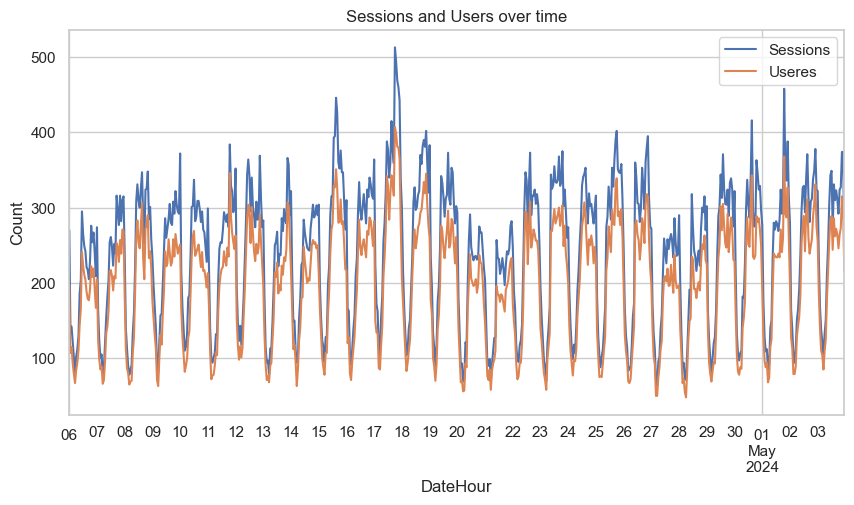

In [13]:
plt.figure(figsize=(10,5))
df.groupby('DateHour')[['Sessions', 'Useres']].sum().plot(ax=plt.gca())
plt.title("Sessions and Users over time")
plt.xlabel("DateHour")
plt.ylabel("Count")
plt.show()

Total Users By Channels

Which marketting channel brought the highest number of users to the website?

C:\Users\Kumar Luv\AppData\Local\Temp\ipykernel_8304\2800852756.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x='Channel group',y='Useres', estimator=np.sum, palette='viridis')


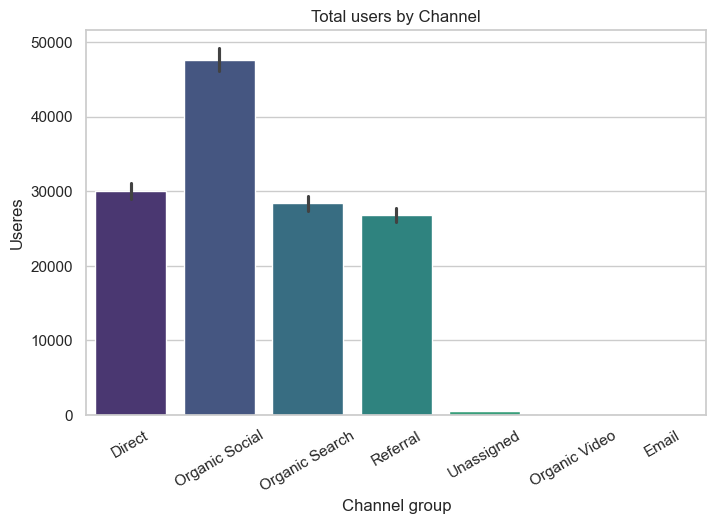

In [14]:
plt.figure(figsize=(8,5))
sns.barplot(data = df, x='Channel group',y='Useres', estimator=np.sum, palette='viridis')
plt.title("Total users by Channel")
plt.xticks(rotation = 30)
plt.show()

In [15]:
df.head()

,Channel group,DateHour,Useres,Sessions,Engaged Sessions,Avg Engaged time per Session,Engaged Session per user,Events per Session,Engagement rate,Event count,Hours
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


Highest average engagement time and behaviour and content effectiveness

C:\Users\Kumar Luv\AppData\Local\Temp\ipykernel_8304\1228447153.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Channel group', y='Avg Engaged time per Session', estimator = np.mean, palette='magma')


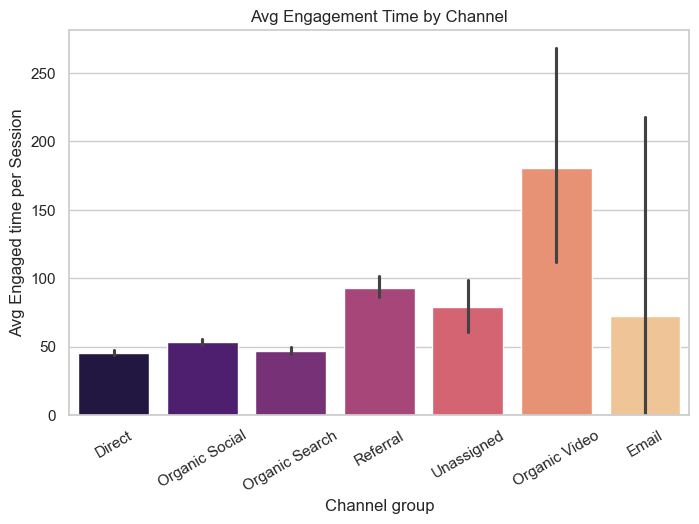

In [16]:
plt.figure(figsize = (8,5))
sns.barplot(data=df, x='Channel group', y='Avg Engaged time per Session', estimator = np.mean, palette='magma')
plt.title("Avg Engagement Time by Channel")
plt.xticks(rotation = 30)
plt.show()

How does Engagement rate vary across different traffic channels?

In [17]:
df.head(2)

,Channel group,DateHour,Useres,Sessions,Engaged Sessions,Avg Engaged time per Session,Engaged Session per user,Events per Session,Engagement rate,Event count,Hours
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
